In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scalp_utils_fif import *
import joblib
import os
from IPython.display import clear_output
from scipy import stats
import xgboost
import mne 
plt.rcParams['figure.figsize'] = [5.5, 4.5]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['figure.dpi'] = 150

In [3]:
# configuration
folder = r"D:\EPI_MFF\NREM_EOG_DB_FIX_F"
egi_nrem_path_HC = folder +"\HC\%s.fif"
egi_nrem_path_EPI = folder +"\EPI\%s.fif"
subjects_HC = [os.path.splitext(x)[0] for x in os.listdir(folder +"\HC")]
subjects_EPI = [os.path.splitext(x)[0] for x in os.listdir(folder +"\EPI")]

subjects_EPI

['AO0', 'DH3', 'MF7', 'MM1', 'SS1', 'TA1', 'YS5']

In [4]:
test_csv = pd.read_csv(r"C:\Users\mad17\Desktop\tests\db\lgbm_bal_sym_0.3-40.csv")
# sort by t-test
test_csv = test_csv.sort_values(by=['mann-whitney'], ascending=True)
test_csv[:50]


,Unnamed: 0,sensor1,sensor2,threshold,t-test,T_p-value,mann-whitney,MU_p-value
5233,5233,E245,E249,0.85,-1.173271,0.261736,0.0,0.001013
5234,5234,E245,E249,0.90,-1.099830,0.291356,0.0,0.000557
5114,5114,E243,E249,0.85,-2.034531,0.062823,2.0,0.002654
2164,2164,E61,E248,0.60,-3.848687,0.002013,3.0,0.004542
3992,3992,E232,E234,0.70,-3.592720,0.003277,3.0,0.004542
3991,3991,E232,E234,0.60,-3.600710,0.003227,3.0,0.002176
5163,5163,E244,E247,0.85,-1.246151,0.234699,3.0,0.002802
2165,2165,E61,E248,0.70,-3.703712,0.002651,3.0,0.003885
4973,4973,E241,E250,0.80,-2.355302,0.034880,3.0,0.004223
5282,5282,E246,E249,0.85,-1.420510,0.178997,3.0,0.003408


In [20]:
AO0[:,0] + AO0[:,1]

NameError: name 'AO0' is not defined

In [7]:
# rf_model = joblib.load('rf_under_19.pkl')
# rf_model_Balanced = joblib.load('rf_full_balanced_19.pkl')
# rf_model_1_10 = joblib.load('rf_full_1_10_ratio_19.pkl')
# lgbm_model = joblib.load('lgbm_under_19.pkl')
# lgbm_model_Balanced = joblib.load('lgbm_full_balanced_19.pkl')
# lgbm_model_1_10 = joblib.load('lgbm_full_1_10_ratio_19.pkl')
# lgbm_model_origin = joblib.load('lgbm_full_origin_19.pkl')
# xgb = joblib.load('xgb_full_origin_19.pkl')
# xgb_Balanced = joblib.load('xgb_full_balanced_19.pkl')
# xgb_1_10 = joblib.load('xgb_full_1_10_ratio_19.pkl')
# lgbm_model_origin_70 = joblib.load('lgbm_full_origin_70_19.pkl')
# lgbm_origin_symmetric = joblib.load('lgbm_full_origin_symmetric_19.pkl')
# lgbm_Balanced_symmetric = joblib.load('lgbm_full_balanced_symmetric_19.pkl')
# xgb_origin_Balanced_70 = joblib.load('xgb_full_balanced_70_19.pkl')
# xgb_model_1_10_70 = joblib.load('xgb_full_1_10_ratio_70_19.pkl')
# lgbm_1_10_ratio_symmetric = joblib.load('lgbm_full_1_10_ratio_symmetric_19.pkl')
# xgb_model_1_10_fixed = joblib.load('xgb_full_1_10_ratio_19_fix_prob.pkl')
# xgb_model_fixed = joblib.load('xgb_full_origin_19_fix_prob.pkl')
# xgb__balanced_symmetric = joblib.load('xgb_full_balanced_symmetric_19.pkl')
# xgb_symmetric = joblib.load('xgb_full_origin_symmetric_19.pkl')
# lgbm_PZ_C4 = joblib.load('lgbm_full_PZ_C4_original_17.pkl')
# xgb_PZ_C4 = joblib.load('xgb_full_PZ_C4_original_17.pkl')
# lgbm_balanced_symmetric = joblib.load('lgbm_full_balanced_symmetric_19.pkl')
# # lgbm_depth = joblib.load(r"C:\Users\mad17\Downloads\lgbm_full_original_depth_xgb_20.pkl")
# # rf_sym = joblib.load(r"C:\Users\mad17\Downloads\rf_full_origin_symmetric_19.pkl")
# # xgb_multi = joblib.load(r"C:\Users\mad17\Downloads\xgb_full_multi_mtl_28 (1).pkl")
# # lgbm_MBS = joblib.load(r"C:\Users\mad17\Downloads\lgbm_full_multi_balanced_symmetric_depth_lgbm_28.pkl")
# # multi2_MBS = joblib.load(r"C:\Users\mad17\Downloads\lgbm_full_multi2_symmetric_balanced_ldepth_28.pkl")
# models = [rf_model, rf_model_Balanced, rf_model_1_10, lgbm_model, lgbm_model_Balanced, lgbm_model_1_10, lgbm_model_origin, xgb, xgb_Balanced, xgb_1_10]
lgbm_s11_f98_b_sym = joblib.load('lgbm_s11_f98_b_sym.pkl')


In [8]:
from mne_features.univariate import get_univariate_funcs, compute_pow_freq_bands
from mne_features.feature_extraction import extract_features
def extract_epochs_features_mne(epochs, subj, sr):
    feat = {
        'subj': np.full(len(epochs), subj),
        'epoch_id': np.arange(len(epochs)),
    }

    selected_funcs = get_univariate_funcs(sr)
    selected_funcs.pop('spect_edge_freq', None)
    bands_dict = {'theta': (4, 8), 'alpha': (8, 12), 'sigma': (12, 16), 'beta': (16, 30), 'gamma': (30, 100), 'fast': (100, 300)}
    params = {'pow_freq_bands__freq_bands': bands_dict, 'pow_freq_bands__ratios': 'all', 'pow_freq_bands__psd_method': 'multitaper',
              'energy_freq_bands__freq_bands': bands_dict}
    X_new = extract_features(np.array(epochs)[:, np.newaxis, :], sr, selected_funcs, funcs_params=params, return_as_df=True)
    X_new['abspow'] = compute_pow_freq_bands(sr, np.array(epochs), {'total': (0.1, 500)}, False, psd_method='multitaper')
    # rename columns
    names = []
    for name in X_new.columns:
        if type(name) is tuple:
            if name[1] == 'ch0':
                names.append(name[0])
            else:
                names.append(name[0] + '_' + name[1].replace('ch0_', ''))
        else:
            names.append(name)

    X_new.columns = names

    # add ratios between bands
    X_new['energy_freq_bands_ab'] = X_new['energy_freq_bands_alpha'] / X_new['energy_freq_bands_beta']
    X_new['energy_freq_bands_ag'] = X_new['energy_freq_bands_alpha'] / X_new['energy_freq_bands_gamma']
    X_new['energy_freq_bands_as'] = X_new['energy_freq_bands_alpha'] / X_new['energy_freq_bands_sigma']
    X_new['energy_freq_bands_af'] = X_new['energy_freq_bands_alpha'] / X_new['energy_freq_bands_fast']
    X_new['energy_freq_bands_at'] = X_new['energy_freq_bands_alpha'] / X_new['energy_freq_bands_theta']
    X_new['energy_freq_bands_bt'] = X_new['energy_freq_bands_beta'] / X_new['energy_freq_bands_theta']
    X_new['energy_freq_bands_bs'] = X_new['energy_freq_bands_beta'] / X_new['energy_freq_bands_sigma']
    X_new['energy_freq_bands_bg'] = X_new['energy_freq_bands_beta'] / X_new['energy_freq_bands_gamma']
    X_new['energy_freq_bands_bf'] = X_new['energy_freq_bands_beta'] / X_new['energy_freq_bands_fast']
    X_new['energy_freq_bands_st'] = X_new['energy_freq_bands_sigma'] / X_new['energy_freq_bands_theta']
    X_new['energy_freq_bands_sg'] = X_new['energy_freq_bands_sigma'] / X_new['energy_freq_bands_gamma']
    X_new['energy_freq_bands_sf'] = X_new['energy_freq_bands_sigma'] / X_new['energy_freq_bands_fast']
    X_new['energy_freq_bands_gt'] = X_new['energy_freq_bands_gamma'] / X_new['energy_freq_bands_theta']
    X_new['energy_freq_bands_gf'] = X_new['energy_freq_bands_gamma'] / X_new['energy_freq_bands_fast']
    X_new['energy_freq_bands_ft'] = X_new['energy_freq_bands_fast'] / X_new['energy_freq_bands_theta']

    # Convert to dataframe
    feat = pd.DataFrame(feat)
    feat = pd.concat([feat, X_new], axis=1)

    return feat


def raw_chan_to_feat(raw, chan, subj):
    epochs = []
    if chan not in raw.ch_names:
        return pd.DataFrame()
    chan_raw = raw.copy().pick([chan]).get_data(reject_by_annotation='NaN').flatten()
    # normalize chan
    chan_norm = (chan_raw - np.nanmean(chan_raw)) / np.nanstd(chan_raw)
    # run on all 250ms epochs (exclude last second)
    for i in range(0, len(chan_norm) - 4 * window_size, window_size):
        if not np.isnan(chan_norm[i: i + window_size]).any():
            epochs.append(chan_norm[i: i + window_size])

    curr_feat = extract_epochs_features_mne(epochs, subj, raw.info['sfreq'])
    # Flatten the nested list using list comprehension
    clean_chan = [item for sublist in epochs for item in sublist]
    chan_feat = {
        'chan_name': chan,
        'chan_ptp': np.ptp(clean_chan),
        'chan_skew': sp_stats.skew(clean_chan),
        'chan_kurt': sp_stats.kurtosis(clean_chan),
    }

    for feat in chan_feat.keys():
        curr_feat[feat] = chan_feat[feat]

    return curr_feat

In [ ]:
eog1 = raw_chan_to_feat(mne.io.read_raw(mtl_path % '018'), 'EOG1', '018')

In [10]:
window_size = 250
el1 = 'E210'
el2 = 'E227'
model = lgbm_s11_f98_b_sym


eog1_dict = {}
eog2_dict = {}
for subj in subjects_HC:
    feat_eog1 = raw_chan_to_feat(mne.io.read_raw(egi_nrem_path_HC % subj), el1, egi_nrem_path_HC)
    clear_output()
    eog1_dict[subj] = feat_eog1
    feat_eog2 = raw_chan_to_feat(mne.io.read_raw(egi_nrem_path_HC % subj), el2, egi_nrem_path_HC)
    clear_output()
    eog2_dict[subj] = feat_eog2
    # E1-LM
   

joblib.dump(eog1_dict, f'eog1_egi.pkl')
joblib.dump(eog2_dict, f'eog2_egi.pkl')
eog1_dict = joblib.load('eog1_egi.pkl')
eog2_dict = joblib.load('eog2_egi.pkl')
feat_all = pd.DataFrame()
for subj in subjects_HC:
    curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
    
    for classifier in [model]:
        # save classifier.predict_proba(curr_feat) in variable with name subj
        vars()[subj] = classifier.predict_proba(curr_feat)
        vars()[subj+'_pred'] = classifier.predict(curr_feat)
        
        print(subj)
eog1_dict = {}
eog2_dict = {}
for subj in subjects_EPI:
    feat_eog1 = raw_chan_to_feat(mne.io.read_raw(egi_nrem_path_EPI % subj), el1, egi_nrem_path_EPI)
    clear_output()
    eog1_dict[subj] = feat_eog1
    feat_eog2 = raw_chan_to_feat(mne.io.read_raw(egi_nrem_path_EPI % subj), el2, egi_nrem_path_EPI)
    clear_output()
    eog2_dict[subj] = feat_eog2

joblib.dump(eog1_dict, f'eog1_egi.pkl')
joblib.dump(eog2_dict, f'eog2_egi.pkl')
eog1_dict = joblib.load('eog1_egi.pkl')
eog2_dict = joblib.load('eog2_egi.pkl')
feat_all = pd.DataFrame()
for subj in subjects_EPI:
    curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
    
    for classifier in [model]:
        # save classifier.predict_proba(curr_feat) in variable with name subj
        vars()[subj] = classifier.predict_proba(curr_feat)
        vars()[subj+'_pred'] = classifier.predict(curr_feat)
        
        print(subj)

Opening raw data file D:\EPI_MFF\NREM_EOG_DB_FIX_F\HC\EB34.fif...
    Range : 787500 ... 1687500 =   3150.000 ...  6750.000 secs
Ready.


C:\Users\mad17\AppData\Local\Temp\ipykernel_17784\1731579257.py:10: RuntimeWarning: This filename (D:\EPI_MFF\NREM_EOG_DB_FIX_F\HC\EB34.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  feat_eog1 = raw_chan_to_feat(mne.io.read_raw(egi_nrem_path_HC % subj), el1, egi_nrem_path_HC)


ValueError: The entries of the given `freq_bands` parameter ([[  4   8]
 [  8  12]
 [ 12  16]
 [ 16  30]
 [ 30 100]
 [100 300]]) must be positive and less than the Nyquist frequency.

In [58]:
el1 = 'E210'
el2 = 'E227'
model = lgbm_s11_f98_b_sym
model_name = str(model)[:str(model).find('(')]

eog1_dict = {}
eog2_dict = {}
for subj in subjects_HC:
    feat_eog1 = get_all_feat_eog_with_chan_feat(el1, subjects=[subj], path=egi_nrem_path_HC)
    clear_output()
    eog1_dict[subj] = feat_eog1
    feat_eog2 = get_all_feat_eog_with_chan_feat(el2, subjects=[subj], path=egi_nrem_path_HC)
    clear_output()
    eog2_dict[subj] = feat_eog2
    # E1-LM
   

joblib.dump(eog1_dict, f'eog1_egi.pkl')
joblib.dump(eog2_dict, f'eog2_egi.pkl')
eog1_dict = joblib.load('eog1_egi.pkl')
eog2_dict = joblib.load('eog2_egi.pkl')
feat_all = pd.DataFrame()
for subj in subjects_HC:
    curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
    
    for classifier in [model]:
        # save classifier.predict_proba(curr_feat) in variable with name subj
        vars()[subj] = classifier.predict_proba(curr_feat)
        vars()[subj+'_pred'] = classifier.predict(curr_feat)
        
        print(subj)
eog1_dict = {}
eog2_dict = {}
for subj in subjects_EPI:
    feat_eog1 = get_all_feat_eog_with_chan_feat(el1, subjects=[subj], path=egi_nrem_path_EPI)
    clear_output()
    eog1_dict[subj] = feat_eog1
    feat_eog2 = get_all_feat_eog_with_chan_feat(el2, subjects=[subj], path=egi_nrem_path_EPI)
    clear_output()
    eog2_dict[subj] = feat_eog2

joblib.dump(eog1_dict, f'eog1_egi.pkl')
joblib.dump(eog2_dict, f'eog2_egi.pkl')
eog1_dict = joblib.load('eog1_egi.pkl')
eog2_dict = joblib.load('eog2_egi.pkl')
feat_all = pd.DataFrame()
for subj in subjects_EPI:
    curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
    
    for classifier in [model]:
        # save classifier.predict_proba(curr_feat) in variable with name subj
        vars()[subj] = classifier.predict_proba(curr_feat)
        vars()[subj+'_pred'] = classifier.predict(curr_feat)
        
        print(subj)

AO0
DH3
MF7
MM1
SS1
TA1
YS5


C:\Users\mad17\AppData\Local\Temp\ipykernel_10428\62497027.py:8: RuntimeWarning: This filename (D:\EPI_MFF\NREM_EOG_DB_FIX_BAL\EPI\AO0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  sample_raw = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_DB_FIX_BAL\EPI\AO0.fif", preload=False, verbose=False)


<Figure size 500x400 with 0 Axes>

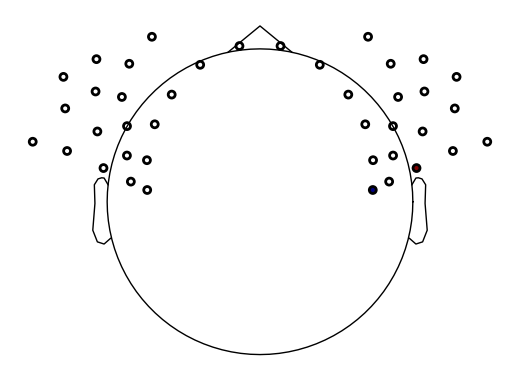

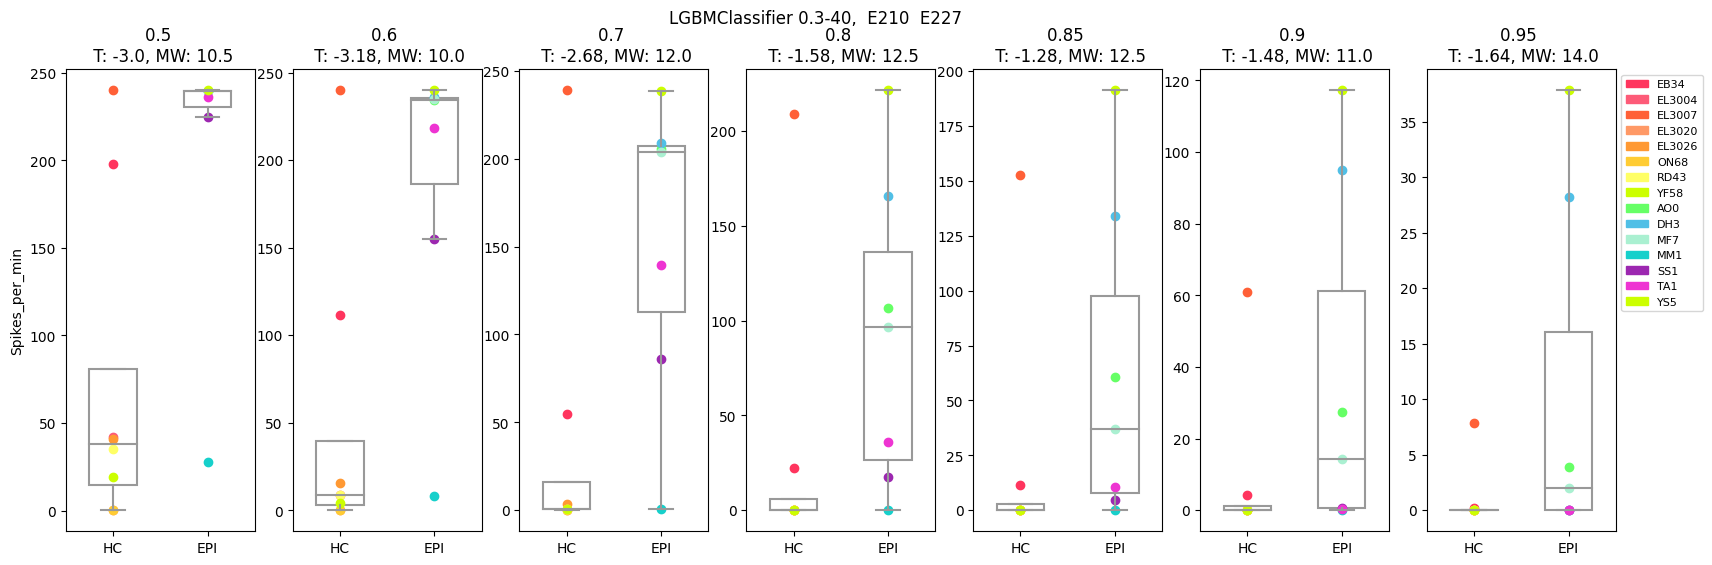

In [59]:
# Plot the results
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, mannwhitneyu
sample_raw = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_DB_FIX_BAL\EPI\AO0.fif", preload=False, verbose=False)

sensors = plt.figure()
sample_raw.plot_sensors(ch_type="eeg" ,ch_groups=[[sample_raw.info['ch_names'].index(el1)],[sample_raw.info['ch_names'].index(el2)]])
tests = pd.DataFrame(columns=['threshols', 't-test', 'p-value', 'mann-whitney', 'p-value'])
colors = ['#ff355e', '#fd5b78', '#ff6037', '#ff9966', '#ff9933', '#ffcc33', '#ffff66', '#ccff00', '#66ff66', '#50bfe6', '#aaf0d1', '#16d0cb', '#9c27b0', '#ee34d2', '#ccff00']	
fig, axs = plt.subplots(1, 7, figsize=(20, 6))
for i, threshold in enumerate([0.5,0.6, 0.7, 0.8, 0.85, 0.9, 0.95]):
    df = pd.DataFrame(columns=['subject', 'Spikes_per_min', 'group'])
    # Check threshold for each subject, if prediction is above threshold, it is considered as spike
    for subj in subjects_HC:
        vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]
        
    for subj in subjects_EPI:
        vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]
    #Sum all spikes for each subject and divide by the number of minutes in the recording to get spikes per minute
    for subj in subjects_HC:
        
        vars()[subj + 'Tr'] = np.sum(vars()[subj+ 'Tr'])/(len(vars()[subj+ 'Tr'])/240)
    for subj in subjects_EPI:
        vars()[subj + 'Tr'] = np.sum(vars()[subj+ 'Tr'])/(len(vars()[subj+ 'Tr'])/240)


    # create df 
    df = pd.DataFrame(columns=['subject', 'Spikes_per_min', 'group'])

     
    for subj in subjects_HC:
        df.loc[len(df)] = [subj, vars()[subj+ 'Tr'], 'HC']
    for subj in subjects_EPI:
        df.loc[len(df)] = [subj, vars()[subj+ 'Tr'], 'EPI']
    # perform t test, mann whitney u test between EPI and HC
    tests.loc[len(tests)] = [threshold, ttest_ind(df[df.group == 'HC'].Spikes_per_min, df[df.group == 'EPI'].Spikes_per_min)[0], ttest_ind(df[df.group == 'HC'].Spikes_per_min, df[df.group == 'EPI'].Spikes_per_min)[1], mannwhitneyu(df[df.group == 'HC'].Spikes_per_min, df[df.group == 'EPI'].Spikes_per_min)[0], mannwhitneyu(df[df.group == 'HC'].Spikes_per_min, df[df.group == 'EPI'].Spikes_per_min)[1]]
    # add colors to df
    df['color'] = colors
    
   
    

    sns.boxplot(x='group', y='Spikes_per_min', data=df, ax=axs[i],color='white', width=0.5, fliersize=0)
    for j, subj in enumerate(subjects_HC):
        axs[i].scatter(0, vars()[subj+ 'Tr'], color=df[df.subject == subj].color.values[0])
        
    
    # set title for each subplot with t-test and mann whitney u test
    axs[i].set_title(f'{threshold} \n T: {round(tests[tests.threshols == threshold].iloc[0, 1], 2)}, MW: {round(tests[tests.threshols == threshold].iloc[0, 3], 2)}')
    
     
#   cycle for EPI subjects to add dot for each subject with different color from colors list
    for j, subj in enumerate(subjects_EPI):
        axs[i].scatter(1, vars()[subj+ 'Tr'], color=df[df.subject == subj].color.values[0])
        # add legend with colors and subject names
        
#   legend with colors and subject names according to df[colors]
    legend_elements = [mpatches.Patch(color=df[df.subject == subj].color.values[0], label=subj) for subj in subjects_HC] + [mpatches.Patch(color=df[df.subject == subj].color.values[0], label=subj) for subj in subjects_EPI]
    
    # show it 1 time
    if i == 0:
            axs[i].legend(handles=legend_elements, bbox_to_anchor = (8.69, 1), fontsize=8)
    

    # set 1 title for the whole figure with model name, threshold range, and el1, el2 names
    fig.suptitle(f'{model_name} 0.3-40,  {el1}  {el2}')
    

for ax in axs:
    ax.set(xlabel='')

for ax in axs[1:]:
    ax.set(ylabel='')



# # save figure
# plt.savefig('LGBM.03_E2.png')


plt.show()


In [46]:
df
# df sort by spikes per minute
df.sort_values(by=['Spikes_per_min'], ascending=False)

,subject,Spikes_per_min,group,color
9,DH3,240.000000,EPI,#50bfe6
10,MF7,240.000000,EPI,#aaf0d1
12,SS1,240.000000,EPI,#9c27b0
13,TA1,240.000000,EPI,#ee34d2
14,YS5,239.983333,EPI,#ccff00
2,EL3007,239.981651,HC,#ff6037
11,MM1,239.979167,EPI,#16d0cb
4,EL3026,239.977528,HC,#ff9933
3,EL3020,239.966667,HC,#ff9966
8,AO0,239.954023,EPI,#66ff66


array([1])

In [47]:
threshold = 0.6
for subj in subjects_HC:
    vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]
        
for subj in subjects_EPI:
    vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]

In [37]:
raw = mne.io.read_raw_egi(r"\\132.66.207.73\rem\27. Nap Memory - Yael\PAT\Subjects_rawdata\IG0\IGO_SLEEP_20210606_132213.mff")

Reading EGI MFF Header from \\132.66.207.73\rem\27. Nap Memory - Yael\PAT\Subjects_rawdata\IG0\IGO_SLEEP_20210606_132213.mff...
    Reading events ...
    Assembling measurement info ...


In [38]:
events = mne.find_events(raw, stim_channel="STI 014")
fwd = mne.read_forward_solution(r"C:\Users\mad17\Desktop\EGI_SPIKES\spikes_notebooks\fwd_egi_256.fif")

ValueError: No stim channel found to extract event triggers.

In [3]:
raw_f = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_DB_FIX_F\HC\EL3020.fif", preload=True)
raw = mne.io.read_raw_egi(r"D:\EPI_MFF\NREM_EOG_DB_FIX_F\HC\EL3020.fif", preload=True)
duration = raw_f.n_times / raw_f.info['sfreq']
fwd = mne.read_forward_solution(r"C:\Users\mad17\Desktop\EGI_SPIKES\spikes_notebooks\fwd_egi_256.fif")
l = []
for i,j in enumerate(EL3020Tr):
    if j == 1:
        new_orig_time = ((i)*0.25)
        # print(new_orig_time)
        # vars()['Annot'+str(i)] = mne.Annotations(
        #     onset=0,
        #     duration=0.25,
        #     description="Spike",
        #     orig_time=new_orig_time,
        # 
        # raw.set_annotations(vars()['Annot'+str(i)])
        l.append(new_orig_time)


       
raw.set_annotations(mne.Annotations(
            onset=l,
            duration=[0.25]*len(l),
            description=["Spike"]*len(l),
           )
 )


Opening raw data file D:\EPI_MFF\NREM_EOG_DB_FIX_F\HC\EL3020.fif...


C:\Users\mad17\AppData\Local\Temp\ipykernel_14264\4203738314.py:1: RuntimeWarning: This filename (D:\EPI_MFF\NREM_EOG_DB_FIX_F\HC\EL3020.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_f = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_DB_FIX_F\HC\EL3020.fif", preload=True)


    Range : 135000 ... 1035000 =    540.000 ...  4140.000 secs
Ready.
Reading 0 ... 900000  =      0.000 ...  3600.000 secs...
Reading EGI header from D:\EPI_MFF\NREM_EOG_DB_FIX_F\HC\EL3020.fif...
    Reading events ...


ValueError: negative dimensions are not allowed

In [41]:
print(raw.annotations)


<Annotations | 11 segments: Spike (11)>


In [51]:
events_from_annot, event_dict = mne.events_from_annotations(raw,chunk_duration=0.125)

Used Annotations descriptions: ['Spike']


In [52]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse

In [53]:


events = events_from_annot

event_id = dict(Spike=1)  # event trigger and conditions
tmin = -0.01  # start of each epoch 
tmax = 0.2  # end of each epoch 
baseline = (None, 0)  # means from the first instant to t = 0


epochs = mne.Epochs(
    raw,
    events,
    event_id,
    tmin,
    tmax,
    proj=True,
    picks=("eeg"),
    baseline=baseline,
)

Not setting metadata
66 matching events found
Setting baseline interval to [-0.01, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 66 events and 211 original time points ...


0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.7e-09 (2.2e-16 eps * 257 dim * 3e+04  max singular value)
    Estimated rank (eeg): 254
    EEG: rank 254 computed from 257 data channels with 0 projectors
    Setting small EEG eigenvalues to zero (without PCA)
Reducing data rank from 257 -> 254


C:\Users\mad17\AppData\Local\Temp\ipykernel_21512\2933080643.py:1: RuntimeWarning: Too few samples (required : 1290 got : 726), covariance estimate may be unreliable
  noise_cov = mne.compute_covariance(


Estimating covariance using SHRUNK
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
Number of samples used : 726
log-likelihood on unseen data (descending order):
   shrunk: -1434.215
   empirical: -74095.027
selecting best estimator: shrunk
[done]
Computing rank from covariance with rank=None
    Using tolerance 6.3e-10 (2.2e-16 eps * 257 dim * 1.1e+04  max singular value)
    Estimated rank (eeg): 254
    EEG: rank 254 computed from 257 data channels with 0 projectors


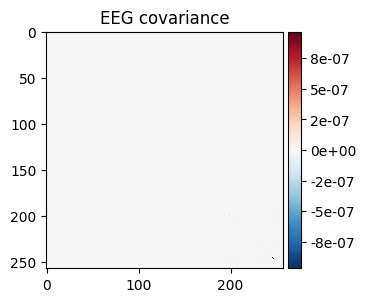

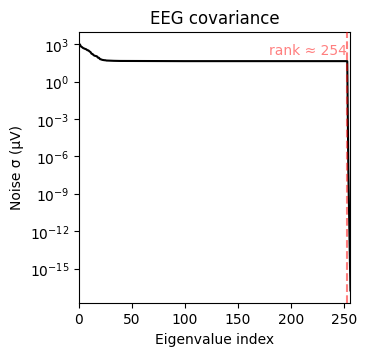

In [54]:
noise_cov = mne.compute_covariance(
    epochs, tmax=0.0, method=["shrunk", "empirical"], rank=None, verbose=True
)

fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, raw.info)

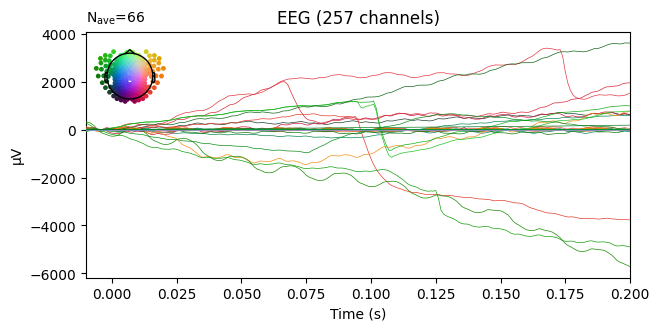

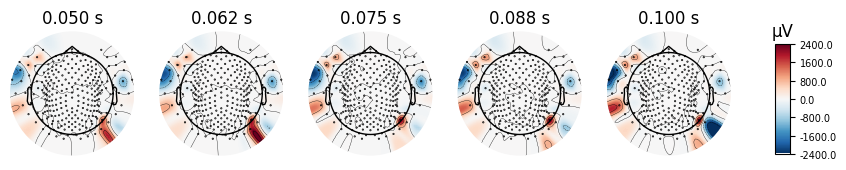

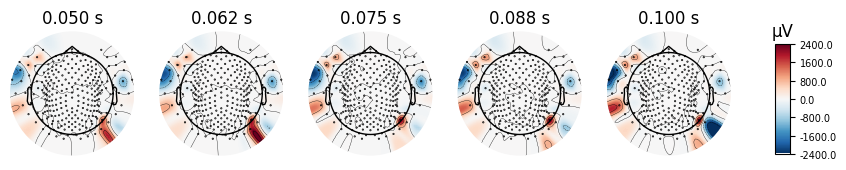

In [55]:
evoked = epochs.average().pick("eeg")
evoked.plot(time_unit="s")
evoked.plot_topomap(times=np.linspace(0.05, 0.1, 5), ch_type="eeg")

Computing rank from covariance with rank=None
    Using tolerance 6.3e-10 (2.2e-16 eps * 257 dim * 1.1e+04  max singular value)
    Estimated rank (eeg): 254
    EEG: rank 254 computed from 257 data channels with 0 projectors
Computing rank from covariance with rank={'eeg': 254}
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 254 (3 small eigenvalues omitted)


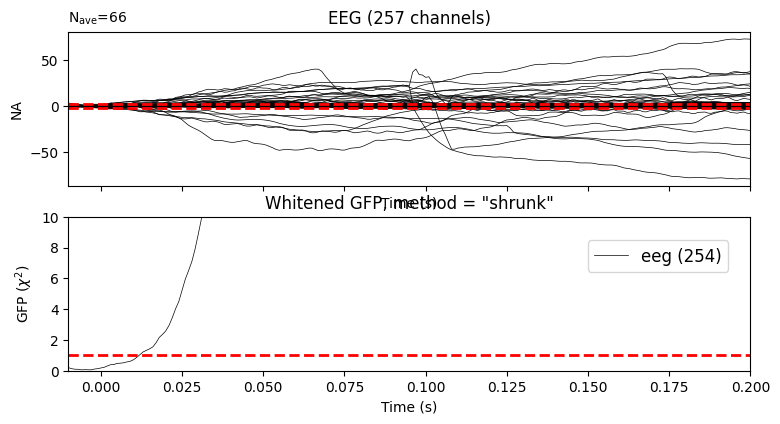

In [56]:
evoked.plot_white(noise_cov, time_unit="s")
del epochs, raw  # to save memory

In [57]:

inverse_operator = make_inverse_operator(
    evoked.info, fwd, noise_cov, loose=0.2, depth=0.8
)


Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....


    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 257 channels.
    257 out of 257 channels remain after picking
Selected 257 channels
Creating the depth weighting matrix...
    257 EEG channels
    limit = 7499/7498 = 9.533873
    scale = 465684 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
Computing rank from covariance with rank=None
    Using tolerance 6.3e-10 (2.2e-16 eps * 257 dim * 1.1e+04  max singular value)
    Estimated rank (eeg): 254
    EEG: rank 254 computed from 257 data channels with 0 projectors
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 11.3012
    scaling factor to adjust the trace = 8.69707e+17 (nchan = 257 nzero = 3)


In [58]:
method = "sLORETA"
snr = 3.0
lambda2 = 1.0 / snr**2
stc, residual = apply_inverse(
    evoked,
    inverse_operator,
    lambda2,
    method=method,
    pick_ori=None,
    return_residual=True,
    verbose=True,
)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 66
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 254 (3 small eigenvalues omitted)
    Computing noise-normalization factors (sLORETA)...


[done]
Applying inverse operator to "Spike"...
    Picked 257 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained   1.5% variance
    Combining the current components...
    sLORETA...
[done]


In [59]:
vertno_max, time_max = stc.get_peak(hemi="rh")
data_path = sample.data_path()
subjects_dir = data_path / "subjects"
surfer_kwargs = dict(
    hemi="both",
    subjects_dir=subjects_dir,
    clim=dict(kind="value", lims=[8, 12, 15]),
    views="lateral",
    initial_time=time_max,
    time_unit="s",
    size=(800, 800),
    smoothing_steps=10,
    
)
brain = stc.plot(**surfer_kwargs)
brain.add_foci(
    vertno_max,
    coords_as_verts=True,
    hemi="both",
    color="blue",
    scale_factor=0.6,
    alpha=1,
    
  
)
brain.add_text(
    0.1, 0.9, "sLORETTA (plus location of maximal activation)", "title", font_size=14
)

# The documentation website's movie is generated with:
# brain.save_movie(..., tmin=0.05, tmax=0.15, interpolation='linear',
#                  time_dilation=20, framerate=10, time_viewer=True)

ValueError: Invalid value for the 'hemi' parameter. Allowed values are 'lh', 'rh', and 'vol', but got 'both' instead.

In [811]:
# sort tests_m by t-test column
tests_m = pd.read_csv(r"C:\Users\mad17\Desktop\tests\lgbm_depth.csv")
tests_m.sort_values(by='mann-whitney', inplace=True)
# dividE on 7 df by threshold
tests_m_5 = tests_m[tests_m.threshold == 0.5]
tests_m_6 = tests_m[tests_m.threshold == 0.6]
tests_m_7 = tests_m[tests_m.threshold == 0.7]
tests_m_8 = tests_m[tests_m.threshold == 0.8]
tests_m_85 = tests_m[tests_m.threshold == 0.85]
tests_m_9 = tests_m[tests_m.threshold == 0.9]
tests_m_95 = tests_m[tests_m.threshold == 0.95]
# find % of rows with MU_p-value < 0.05 in each df
print('0,5 ', len(tests_m_5[tests_m_5['MU_p-value'] < 0.05])/len(tests_m_5))
print('0,6 ',len(tests_m_6[tests_m_6['MU_p-value'] < 0.05])/len(tests_m_6))
print('0,7 ',len(tests_m_7[tests_m_7['MU_p-value'] < 0.05])/len(tests_m_7))
print('0,8 ',len(tests_m_8[tests_m_8['MU_p-value'] < 0.05])/len(tests_m_8))
print('0,85 ',len(tests_m_85[tests_m_85['MU_p-value'] < 0.05])/len(tests_m_85))
print('0,9 ',len(tests_m_9[tests_m_9['MU_p-value'] < 0.05])/len(tests_m_9))
print('0,95 ',len(tests_m_95[tests_m_95['MU_p-value'] < 0.05])/len(tests_m_95))
# leave only rows with MU_p-value < 0.05 in each df
tests_m_5 = tests_m_5[tests_m_5['MU_p-value'] < 0.05]
tests_m_6 = tests_m_6[tests_m_6['MU_p-value'] < 0.05]
tests_m_7 = tests_m_7[tests_m_7['MU_p-value'] < 0.05]
tests_m_8 = tests_m_8[tests_m_8['MU_p-value'] < 0.05]
tests_m_85 = tests_m_85[tests_m_85['MU_p-value'] < 0.05]
tests_m_9 = tests_m_9[tests_m_9['MU_p-value'] < 0.05]
tests_m_95 = tests_m_95[tests_m_95['MU_p-value'] < 0.05]




0,5  0.2423076923076923
0,6  0.3141025641025641
0,7  0.2987179487179487
0,8  0.17051282051282052
0,85  0.13076923076923078
0,9  0.12179487179487179
0,95  0.13205128205128205


AVG

In [5]:
def spikes_per_min(model, el1, el2, threshold):
    global df
    eog1_dict = {}
    eog2_dict = {}
    for subj in subjects_HC:
        feat_eog1 = get_all_feat_eog_with_chan_feat(el1, subjects=[subj], path=egi_nrem_path_HC)
        clear_output()
        eog1_dict[subj] = feat_eog1
        feat_eog2 = get_all_feat_eog_with_chan_feat(el2, subjects=[subj], path=egi_nrem_path_HC)
        clear_output()
        eog2_dict[subj] = feat_eog2
        # E1-LM
    

    joblib.dump(eog1_dict, f'eog1_egi.pkl')
    joblib.dump(eog2_dict, f'eog2_egi.pkl')
    eog1_dict = joblib.load('eog1_egi.pkl')
    eog2_dict = joblib.load('eog2_egi.pkl')
    feat_all = pd.DataFrame()
    for subj in subjects_HC:
        curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
        
        for classifier in [model]:
            # save classifier.predict_proba(curr_feat) in variable with name subj
            vars()[subj] = classifier.predict_proba(curr_feat)
            
            
            print(subj)
    eog1_dict = {}
    eog2_dict = {}
    for subj in subjects_EPI:
        feat_eog1 = get_all_feat_eog_with_chan_feat(el1, subjects=[subj], path=egi_nrem_path_EPI)
        clear_output()
        eog1_dict[subj] = feat_eog1
        feat_eog2 = get_all_feat_eog_with_chan_feat(el2, subjects=[subj], path=egi_nrem_path_EPI)
        clear_output()
        eog2_dict[subj] = feat_eog2

    joblib.dump(eog1_dict, f'eog1_egi.pkl')
    joblib.dump(eog2_dict, f'eog2_egi.pkl')
    eog1_dict = joblib.load('eog1_egi.pkl')
    eog2_dict = joblib.load('eog2_egi.pkl')
    feat_all = pd.DataFrame()
    for subj in subjects_EPI:
        curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
        
        for classifier in [model]:
            # save classifier.predict_proba(curr_feat) in variable with name subj
            vars()[subj] = classifier.predict_proba(curr_feat)
            
            
            print(subj)
    for subj in subjects_HC:
        vars()[subj + "Tr"] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]
    
    for subj in subjects_EPI:
        vars()[subj + "Tr"] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]
    
    for subj in subjects_HC:
    
        vars()[subj + 'Tr'] = np.sum(vars()[subj+ 'Tr'])/(len(vars()[subj+ 'Tr'])/240)
    for subj in subjects_EPI:
        vars()[subj + 'Tr'] = np.sum(vars()[subj+ 'Tr'])/(len(vars()[subj+ 'Tr'])/240)
    df = pd.DataFrame(columns=['subject', 'Spikes_per_min', 'group'])
    for subj in subjects_HC:
        df.loc[len(df)] = [subj, vars()[subj+ 'Tr'], 'HC 8 ']
    for subj in subjects_EPI:
        df.loc[len(df)] = [subj, vars()[subj+ 'Tr'], 'EPI 7']
    
    return df
   


In [14]:
threshold = 0.7
spikes_per_min(lgbm_Balanced_symmetric, 'E245', 'E249', threshold)
df1 = df.copy()
spikes_per_min(lgbm_Balanced_symmetric, 'E231', 'E235', threshold)
df2 = df.copy()
df['Spikes_per_min'] = df1['Spikes_per_min'] + df2['Spikes_per_min']
df['Spikes_per_min'] = df['Spikes_per_min']/2


AO0
DH3
MF7
MM1
SS1
TA1
YS5


MannwhitneyuResult(statistic=6.0, pvalue=0.009324009324009324)
Ttest_indResult(statistic=-3.4798940568920456, pvalue=0.004067930343452402)


C:\Users\mad17\AppData\Local\Temp\ipykernel_7768\4151215140.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='group', y='Spikes_per_min', data=df, palette="Set2", size=7)


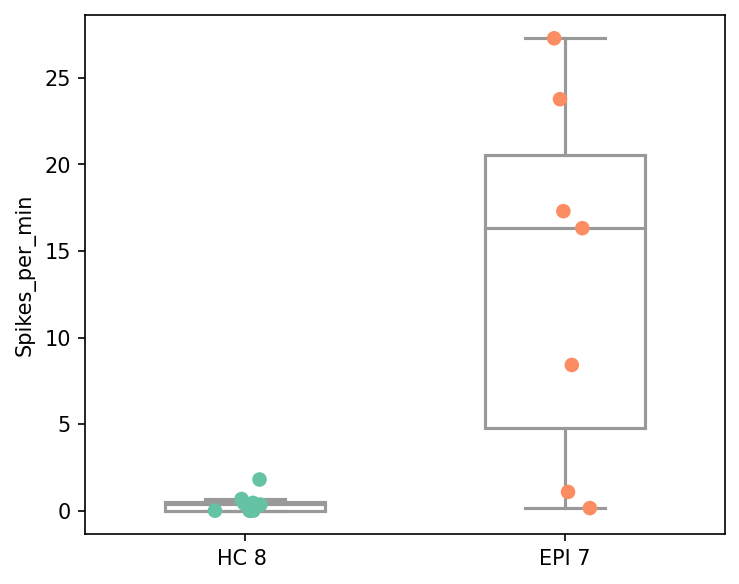

In [20]:
import seaborn as sns

print(stats.mannwhitneyu(df[df.group == 'HC 8 '].Spikes_per_min, df[df.group == 'EPI 7'].Spikes_per_min))

print(stats.ttest_ind(df[df.group == 'HC 8 '].Spikes_per_min, df[df.group == 'EPI 7'].Spikes_per_min))

sns.boxplot(x='group', y='Spikes_per_min', data=df,color='white', width=0.5, fliersize=0)
sns.stripplot(x='group', y='Spikes_per_min', data=df, palette="Set2", size=7)


# add p-value near upper borderof the plot
# plt.text(0.5, 0.09, f"p-value = {round(stats.mannwhitneyu(df[df.group == 'HC 8 '].Spikes_per_min, df[df.group == 'EPI 7'].Spikes_per_min)[1], 4)}", ha='center', va='center', fontsize=14)



# plt.ylim(-0.003, 0.1)

plt.xlabel('')
plt.show()


In [785]:
# leave only EPI in df
df = df[df.group == 'EPI 7']

In [836]:
# plot confidence interval
st.t.interval(alpha=0.95, df=len(df['Spikes_per_min'])-1, loc=np.mean(df['Spikes_per_min']), scale=st.sem(df['Spikes_per_min']))


C:\Users\mad17\AppData\Local\Temp\ipykernel_12340\4004341222.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(df['Spikes_per_min'])-1, loc=np.mean(df['Spikes_per_min']), scale=st.sem(df['Spikes_per_min']))


(0.0019735651238574313, 0.02328416231137769)

In [40]:
raw = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_DB_FIX\EPI\YS5.fif", preload=True)
raw = raw.pick_channels(['E241'])
vl = []

Opening raw data file D:\EPI_MFF\NREM_EOG_DB_FIX\EPI\YS5.fif...
    Range : 22500 ... 922500 =     90.000 ...  3690.000 secs
Ready.
Reading 0 ... 900000  =      0.000 ...  3600.000 secs...


C:\Users\mad17\AppData\Local\Temp\ipykernel_17940\2717760709.py:1: RuntimeWarning: This filename (D:\EPI_MFF\NREM_EOG_DB_FIX\EPI\YS5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_DB_FIX\EPI\YS5.fif", preload=True)


In [105]:
el1 = 'E61'
el2 = 'E244'
model = lgbm_Balanced_symmetric
model_name = str(model)[:str(model).find('(')]

eog1_dict = {}
eog2_dict = {}
for subj in subjects_HC:
    feat_eog1 = get_all_feat_eog_with_chan_feat(el1, subjects=[subj], path=egi_nrem_path_HC)
    clear_output()
    eog1_dict[subj] = feat_eog1
    feat_eog2 = get_all_feat_eog_with_chan_feat(el2, subjects=[subj], path=egi_nrem_path_HC)
    clear_output()
    eog2_dict[subj] = feat_eog2
    # E1-LM
   

joblib.dump(eog1_dict, f'eog1_egi.pkl')
joblib.dump(eog2_dict, f'eog2_egi.pkl')
eog1_dict = joblib.load('eog1_egi.pkl')
eog2_dict = joblib.load('eog2_egi.pkl')
feat_all = pd.DataFrame()
for subj in subjects_HC:
    curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
    
    for classifier in [model]:
        # save classifier.predict_proba(curr_feat) in variable with name subj
        vars()[subj] = classifier.predict_proba(curr_feat)
        vars()[subj+'_pred'] = classifier.predict(curr_feat)
        
        print(subj)
eog1_dict = {}
eog2_dict = {}
for subj in subjects_EPI:
    feat_eog1 = get_all_feat_eog_with_chan_feat(el1, subjects=[subj], path=egi_nrem_path_EPI)
    clear_output()
    eog1_dict[subj] = feat_eog1
    feat_eog2 = get_all_feat_eog_with_chan_feat(el2, subjects=[subj], path=egi_nrem_path_EPI)
    clear_output()
    eog2_dict[subj] = feat_eog2

joblib.dump(eog1_dict, f'eog1_egi.pkl')
joblib.dump(eog2_dict, f'eog2_egi.pkl')
eog1_dict = joblib.load('eog1_egi.pkl')
eog2_dict = joblib.load('eog2_egi.pkl')
feat_all = pd.DataFrame()
for subj in subjects_EPI:
    curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
    
    for classifier in [model]:
        # save classifier.predict_proba(curr_feat) in variable with name subj
        vars()[subj] = classifier.predict_proba(curr_feat)
        vars()[subj+'_pred'] = classifier.predict(curr_feat)
        
        print(subj)

AO0
DH3
MF7
MM1
SS1
TA1
YS5


In [77]:
threshold = 0.7
for subj in subjects_HC:
    vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]
    vl.append(subj + 'Tr')   
for subj in subjects_EPI:
    vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]
    vl.append(subj + 'Tr')
for i in vl:
    le = len(eval(i))
    vars()[i + 'le'] = [0] * le
    for j in range(le):
        vars()[i + 'le'][j] = 25 * j

In [78]:
for i in vl:
    time = eval(i+"le")
    vars()[i + 'ms'] = []
    for j,v in enumerate(eval(i)):
        if v == 1:
            vars()[i + 'ms'].append(time[j])
            
  


In [132]:
threshold = 0.4
for subj in subjects_HC:
    vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]
        
for subj in subjects_EPI:
    vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 1]]

In [130]:
raw = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_F\EPI\AO0.fif", preload=True)

duration = raw.n_times / raw.info['sfreq']

l = []
for i,j in enumerate(AO0Tr):
    if j == 1:
        new_orig_time = ((i)*0.25)
        # print(new_orig_time)
        # vars()['Annot'+str(i)] = mne.Annotations(
        #     onset=0,
        #     duration=0.25,
        #     description="Spike",
        #     orig_time=new_orig_time,
        # )
        # raw.set_annotations(vars()['Annot'+str(i)])
        l.append(new_orig_time)


       
raw.set_annotations(mne.Annotations(
            onset=l,
            duration=[0.25]*len(l),
            description=["Spike"]*len(l),
           )
 )


Opening raw data file D:\EPI_MFF\NREM_EOG_F\EPI\AO0.fif...
    Range : 60000 ... 712500 =    240.000 ...  2850.000 secs
Ready.
Reading 0 ... 652500  =      0.000 ...  2610.000 secs...


C:\Users\mad17\AppData\Local\Temp\ipykernel_17940\2217494447.py:1: RuntimeWarning: This filename (D:\EPI_MFF\NREM_EOG_F\EPI\AO0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_F\EPI\AO0.fif", preload=True)


<Raw | AO0.fif, 48 x 652501 (2610.0 s), ~239.1 MB, data loaded>

In [123]:
AO0Tr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [126]:
raw.annotations.save("saved-annotations.csv", overwrite=True)

Overwriting existing file.


In [127]:
mne.read_annotations("saved-annotations.csv")

<Annotations | 873 segments: Spike (873)>

In [102]:
print(raw.annotations)


<Annotations | 0 segments>


In [133]:
raw.plot()

Channels marked as bad:
none
